# **Momento de Retroalimentación: Módulo 2 Implementación de una técnica de aprendizaje máquina sin el uso de un framework. (Portafolio Implementación)**

## **Instrucciones**

**Entregable:** Implementación de una técnica de aprendizaje máquina sin el uso de un framework.

1. Crea un repositorio de GitHub para este proyecto.
2. Programa uno de los algoritmos vistos en el módulo (o que tu profesor de módulo autorice) sin usar ninguna biblioteca o framework de aprendizaje máquina, ni de estadística avanzada. Lo que se busca es que implementes manualmente el algoritmo, no que importes un algoritmo ya implementado.
3. Prueba tu implementación con un set de datos y realiza algunas predicciones. Las predicciones las puedes correr en consola o las puedes implementar con una interfaz gráfica apoyándote en los visto en otros módulos.
4. Después de la entrega intermedia se te darán correcciones que puedes incluir en tu entrega final.

## **Acerca de los datos...**

Elegí este dataset "**Marvel Superhero Movies**" debido a que me intrigó un poco el desempeño de las películas de superhérores, en concreto las de Marvel, debido a que estas actualmente se encuentran en un gran declive y si las comparamos con las películas de hace no muchos años, presentaban mejores resultados en cuanto a recaudaciones y opiniones populares. Para este entregable, se utilizará el archivo **"Marvel_Movies.csv"**, y he optado por elegir los datos relacionados a las ganancias generadas durante el fin de semana de apertura y el segundo fin de semana, ya que en primera instancia debe existir una relación en base al recibimiento del público durante la primera semana y la segunda. El enlace a la página de dónde se obtuvieron los datos es <a href="https://www.kaggle.com/datasets/joebeachcapital/marvel-movies">el siguente</a>.

### **¿Qué se espera hacer con este dataset?**

Dentro del dataset se encuentran múltiples variables que se podrían utilizar para una variedad de análisis y estimaciones, es este se incluyen registros como:

1. **film:** Nombre de la película.
2. **category:** Ctegoría de la película. En concreto se refiere a si la película pertenece a un subconjunto de películas, como una trilogía o una saga (Avengers, Captain America, IronMan, Thor, etc.).
3. **worldwide gross (m):** Recaudación mundial bruta de la película en millones de dólares.
4. **% budget recovered:** Porcentaje de presupuesto recuperado de la película.
5. **critics % score:** Porcentaje del puntaje de la película según los críticos.
6. **audience % score:** Porcentaje del puntaje de la película según la audicencia.
7. **audience vs critics % deviance:** Porcentaje que representa la diferencia entre los porcentajes de la opinión de la crítica y la audiencia.
8. **budget:** Presupuesto de la película en millones de dólares.
9. **domestic gross (m):** Recaudación total recibida por todos los sectores de la economía estadounidense generada por la película.
10. **international gross (m):** Recaudación total recibida por todos los sectores de la economía internacional generada por la película.
11. **opening weekend (m)**: Recaudación de la película durante el primer fin de semana de estreno en millones de dólares.
12. **second weekend (m):** Recaudación de la película durante el segundo fin de semana en millones de dólares.
13. **1st vs 2nd weekend drop off:** Porcentaje de caída en la recaudación entre el primer y segundo fin de semana.
14. **% gross from opening weekend:** Porcentaje de la recaudación total de la película que proviene del primer fin de semana de estreno.
15. **% gross from domestic:** Porcentaje de la recaudación total de la película que proviene del mercado doméstico.
16. **% gross from international:** Porcentaje de la recaudación total de la película que proviene del mercado internacional.
17. **% budget opening weekend:** Porcentaje del presupuesto de la película gastado en el primer fin de semana de estreno.
18. **year:** Año de lanzamiento de la película.
19. **source:** Fuente de los datos o información sobre la película.

De todos los datos descritos, quiero generar una predicción o estimación de datos con uso de regresión utilizando los datos de la primera semana de recaudación, presupuesto invertido en la película, porcentaje de presupuesto invertido durante la semana de apertura y el porcentaje de calificación según la audiencia para estimar los valores de la segunda semana de recaudación ($MUSD). Esto con el fin de poner en práctica los conocimientos adquiridos durante estas semanas de clases acerca de modelos de Machine Learning.

### **¿Qué modelo se utilizará?**

Pensé en aplicar regresión lineal o logística, sin embargo y como no tuvimos mucho tiempo para implementarlo en clase, me decidí en implementar la regresión polinomial, de la cual realicé el ejercicio encargado en clase para prácticar y espero que con ello este entregable arroje resultados aproximados a los esperados.

Se tomarán en cuenta los primeros 20 datos de las columnas **"opening weekend"**, **"budget"**, **"% gross from opening weekend"** y **"audience % score"** para entrenamiento, y los últimos 10 datos se destinarán para generar estimaciones con respecto a la columna **"second weekend"**. Es así que comprobaremos si el algoritmo logra estimar las recaudaciones que se generarán el fin de semana siguiente a el fin de semana de apertura.

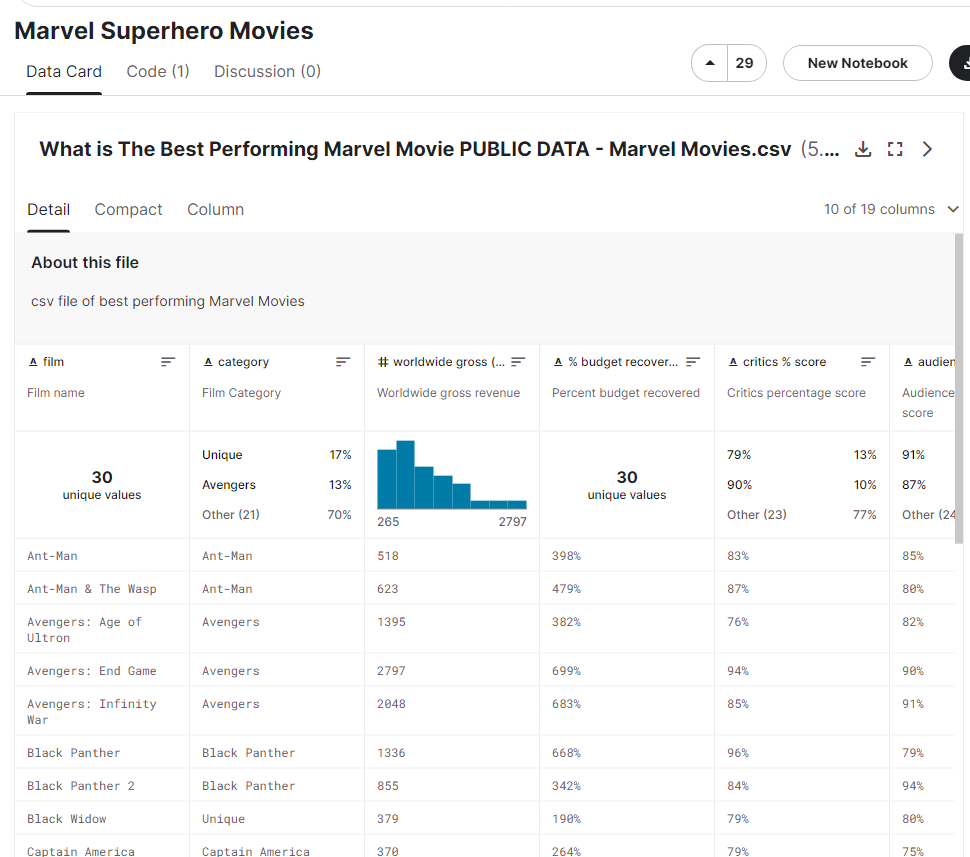

## **Antes de empezar**
Lo primero que debemos hacer es cargar los datos (listas), librerías y declarar valores iniciales de los hiper-parámetros. Para ello, debemos:

Ejecutar esta celda solo si estas utilizando Google Colab. Se deberá subir el archivo CSV a nuestro Drive y montarlo dentro de Colab:

In [158]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Colocamos la ruta dónde se encuentra el archivo CSV y extraemos los datos que vamos a analizar:

In [159]:
import pandas as pd
import matplotlib.pyplot as plt

# Editar el path de ser necesario
data = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Machine Learning/Marvel_Movies.csv')

# Extraemos las columnas con datos para generar una predicción:
# Lista con todos los valores de la variable independiente
x1All = data["opening weekend ($m)"].astype(float).values.tolist()
x2All = data["budget"].astype(float).values.tolist()
x3All = data["% gross from opening weekend"].astype(float).values.tolist()
x4All = data['audience % score'].str.replace('%', '').astype(float) / 100.0
# Lista con todos los valores de la variable dependiente
yAll = data['second weekend ($m)'].astype(float).values.tolist()

# Lista con los valores de entrenamiento de la variable independiente
x1 = x1All[:20]
x2 = x2All[:20]
x3 = x3All[:20]
x4 = x4All[:20]
# Lista con el resto de los valores de validación de la variable independiente
x1Val = x1All[20:]
x2Val = x2All[20:]
x3Val = x3All[20:]
x4Val = x4All[20:]
# Lista con los valores a considerar de la variable dependiente
y = yAll[:20]
# Lista con el resto de los valores ded validación de la variable dependiente
yVal = yAll[20:]

# Lista con los hiper-parámetros iniciales (thetas)
theta = [0, 0.1000096735742, 0.2000087694353, 0.3000037482756, 0.40000013466245]
# Valor de learningRate (alpha)
alpha = 0.000000000000001

Establecemos la función de hipótesis a utilizar. En este caso utilizaremos la regresión polinomial, por ende necesitaremos el módulo **math**:

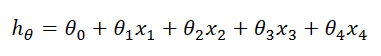

In [160]:
def h(x1, x2, x3, x4, theta):
    # Calculamos la función de hipótesis
    h = theta[0] + (theta[1] * x1) + (theta[2] * x2) + (theta[3] * x3) + (theta[4] * x4)
    return h

# Calculamos el total de las muestras a partir de los datos (n)
n = len(x1)

También necesitamos una variable para el total de iteraciones, con el fin de garantizar que ambos métodos se entrenen bajo las mismas condiciones:

In [161]:
m = 30

## Entrenamiento (N Iteraciones)

In [162]:
# Implementamos el ciclo para m iteraciones
for i in range (0, m):
  # Creamos los acumuladores
  delta = []
  deltaX1 = []
  deltaX2 = []
  deltaX3 = []
  deltaX4 = []
  # Recorremos el dataset
  for x1i, x2i, x3i, x4i, yi in zip(x1, x2, x3, x4, y):
    # Resultado de la función de hipótesis de cada muestra
    pred = h(x1i, x2i, x3i, x4i, theta)
    # Calculamos delta para theta0 y para cada muestra
    delta.append(pred - yi)
    # Calculamos delta para theta1 y para cada muestra
    deltaX1.append((pred - yi) * x1i)
    # Calculamos delta para theta2 y para cada muestra
    deltaX2.append((pred - yi) * x2i)
    # Calculamos delta para theta3 y para cada muestra
    deltaX3.append((pred - yi) * x3i)
    # Calculamos delta para theta4 y para cada muestra
    deltaX4.append((pred - yi) * x4i)

  # Calcular sumatorias y promedio
  dJt0 = 1/n * sum(delta)
  dJt1 = 1/n * sum(deltaX1)
  dJt2 = 1/n * sum(deltaX2)
  dJt3 = 1/n * sum(deltaX3)
  dJt4 = 1/n * sum(deltaX4)

  # print("Iteración", (i + 1))

  # Actualizamos el valor de theta
  theta[0] = theta[0] - (alpha * dJt0)
  theta[1] = theta[1] - (alpha * dJt1)
  theta[2] = theta[2] - (alpha * dJt2)
  theta[3] = theta[3] - (alpha * dJt3)
  theta[4] = theta[4] - (alpha * dJt4)

  # print("Valor de theta: ", theta, "\n")

print("Valor final de theta: ", theta, "\n")

Valor final de theta:  [-2.718269090558422e-13, 0.10000967356351521, 0.20000876938965234, 0.30000374826369286, 0.40000013466223017] 



## Evaluamos el rendimiento del modelo durante el entrenamiento con MSE
Utilizaremos métodos tradicionales para medir el error cuadrático medio y saber qué tanto se equivoca el modelo con respecto a los valores reales. Se realiza la evaluación del modelo por medio de MSE debido de a que nos permite conocer la diferencia cuadrada promedio entre los valores que predice mi modelo en base a datos de entrenamiento y los reales. Provee una medida cuantitativa de qué tan bueno es el modelo de regresión, y qué tan aproximada es la relación entre los valores de entrada y la salida:

In [163]:
# Inicializamos la suma de los errores cuadrados
mse = 0.0

# Iteramos a través del dataset para calcular lso errores cuadrados
for x1i, x2i, x3i, x4i, yi in zip(x1Val, x2Val, x3Val, x4Val, yVal):
    # Calculamos el valor estimado utilizando la función de hipótesis
    pred = h(x1i, x2i, x3i, x4i, theta)
    # Calculamos el error cuadrado para este punto de los datos
    squared_error = (pred - yi) ** 2
    # Añadimos el error cuadrado a la sumatoria
    mse += squared_error

# Calculamos el error cuadrado promedio (MSE)
mse /= len(x1Val)

print("Mean Squared Error (MSE) on Validation Data:", mse)


Mean Squared Error (MSE) on Validation Data: 252.10632673604354


Por lo que podemos observar, el error es bastante alto con *252.10* de MSE aproximadamente. Lo que se busca para que el modelo reduzca su error es ajustar los hiperparámetros proporcionados, experiemntar y variar dichos valores para que al final nos otorgue un valor lo bastante reducido como para considerar al modelo como algo confiable y preciso. En mi caso, he intentado con múltiples valores y este valor es lo mejor que he podido conseguir para mi modelo de regresión polinomial. Algunos valores que obtuve se disparaban bastante, llegando a 650 de MSE aproximadamente, otros entre 800, 900 o 1000, pero lo más que logré reducirlo fue entre valores de 300 a 250, lo cuál no está mal, pero soy consciente de que este número se puede reducir aún más.

# Evaluación con el set de validación

En esta parte realizaremos la estimación para cada uno de los valores de validación:

In [168]:
yEst = []
for x1i, x2i, x3i, x4i in zip(x1Val, x2Val, x3Val, x4Val):
  est = h(x1i, x2i, x3i, x4i, theta)
  yEst.append(est)
  print(est)

70.4955968590517
47.95416699260717
48.784391702836416
57.55079775650556
75.98838907815808
76.05810048004275
51.252293315286295
77.25574285247131
60.25090496432617
47.69608035439141


## Evaluamos el rendimiento del modelo durante las pruebas con MSE

In [169]:
# inicializamos la sumatoria de los errores cuadrados para las predicciones
mse_predictions = 0.0

# Iteramos a través del dataset para calcular los errores cuadrados para las predicciones
for yi, y_est in zip(yVal, yEst):
    # Calculamos el error cuadrado para es punto de los datos
    squared_error = (y_est - yi) ** 2
    # Añadimos el error cuadrado a la sumatoria
    mse_predictions += squared_error

# Calculamos el error cuadrado medio para las predicciones realizadas
mse_predictions /= len(yVal)

print("Mean Squared Error (MSE) for Predictions:", mse_predictions)


Mean Squared Error (MSE) for Predictions: 252.10632673604354


Como podemos observar, el MSE  es prácticamente el mismo (o es bastante aproximado) al obtenido durante el entrenamiento, por lo que el comportamiento del modelo no varia con ninguno de los sets de datos. Quiero resaltar nuevamente que a pesar de ser un valor algo elevado para el MSE, 252.10 es de los mejores valores que he obtenido en cuenta a error cuadrátrico medio respecta, y como vimos en el apartado de predicciones, estos valores n ose encuentran muy lejanos a los valores reales, conservando un rango muy generoso entre datos reales y estimados.

## Tabla Comparativa de Visualización de Datos
En este apartado se colocan todas las variables influyentes para el modelo construido. Tenemos "opening weekend", "budget", "% gross from opening weekend" y "audience % score" como variables de entrada, "second weekend" como valor real y "estimated second weekend" como los resultados estimados para "second weekend".

In [170]:
from tabulate import tabulate

table_data = list(zip(x1Val, x2Val, x3Val, x4Val, yVal, yEst))

headers = ['Opening Weekend ($MUSD)', "Budget", "% gross from Opening Weekend", "Audience % Score", '2nd Weekend ($MUSD)', 'Estimated 2nd Weekend ($MUSD)']

table = tabulate(table_data, headers=headers, tablefmt='pretty')

print(table)

+-------------------------+--------+------------------------------+------------------+---------------------+-------------------------------+
| Opening Weekend ($MUSD) | Budget | % gross from Opening Weekend | Audience % Score | 2nd Weekend ($MUSD) | Estimated 2nd Weekend ($MUSD) |
+-------------------------+--------+------------------------------+------------------+---------------------+-------------------------------+
|          174.0          | 200.0  |             42.6             |       0.78       |        72.5         |       70.4955968590517        |
|          75.0           | 150.0  |             33.6             |       0.93       |        34.7         |       47.95416699260717       |
|          93.0           | 160.0  |             23.7             |       0.93       |        45.3         |      48.784391702836416       |
|          117.0          | 175.0  |             35.0             |       0.87       |        44.0         |       57.55079775650556       |
|          26

Como podemos observar, la diferencia entre los valores de "second weekend" y "estimated second weekend" no son tan lejanos como el MSE nos podría llegar hacer pensar. Sin embargo, el modelo aún posee un área de oportunidad que con su debido refinamiento y ajuste, podría mejorar tanto el margen de los errores así como la brecha que existe entre valores actuales y estimados.

## Gráfica de comparación (Datos Actuales vs Datos Estimados)
No se realizó alguna otra gráfica o representación visual que contuviera las 4 variables de entrada por la complejidad de manejar gráficas de cuatro dimensiones. Por fines de simplicidad, consideré prudente tomar los valores que en el entregable original quería utilizar desde un inicio, es decir, grafiqué "second weekend" y "estimated second weekend" con respecto a "opening weekend" para tener una visualización clara de cómo se comportan los datos estimados en comparación con los datos reales:

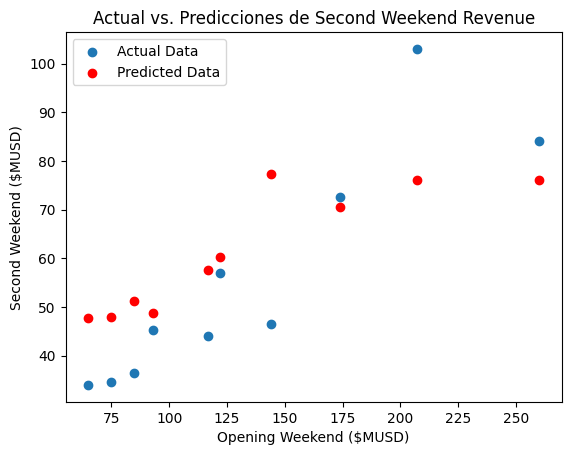

In [172]:
# Graficamos los datos originales
plt.scatter(x1Val, yVal, label='Actual Data')

# Graficamos los datos estimados por la red neuronal
plt.scatter(x1Val, yEst, color='red', label='Predicted Data')

plt.xlabel('Opening Weekend ($MUSD)')
plt.ylabel('Second Weekend ($MUSD)')
plt.title('Actual vs. Predicciones de Second Weekend Revenue')
plt.legend()
plt.show()

Puede no ser la mejor representación gráfica, más por la ausencia de las demás variables de entrada, aún así es una forma bastante útil de representar los datos, en especial porque podemos comparar fácilmente las diferencias y dispersiones que poseen ambos conjuntos de datos (datos actuales vs datos estimados).

## Conclusión

Considero que este modelo no es perfecto ni de lejos, sin embargo intenté otorgarle los mejores parámetros que pude para que los valores estimados fueran lo más cercanos a los valores reales. Jugué bastante con el learningRate, el número de iteraciones y los valores iniciales de theta para probar diversas combinaciones y finalmente llegar a unos resultados, que si bien no son enteramente certeros, al menos se aproximan un poco a lo que es la realidad. Me quedo conforme con los resultados arrojados por el modelo, a pesar de recibir un MSE de 250 aproximadamente tanto en entrenamiento como en predicción, los datos son bastante certeros y no se encuentran tan alejados de los valores reales.

Evidentemente este modelo puede mejorar si sigo cambiando los valores de los parámetros, inclusive se tendrían que hacer algunos análisis a los datos y al comportamiento del algoritmo para determinar su desempeño y comprender de mejor forma cuál sería la mejor configuración para adaptar este modelo y que retorne los valores más precisos, pero de momento me quedo satisfecho con el trabajo hecho ya que no tuvimos un ejercicio en clase realizando este tipo de predicciones con regresión polinomial, y al final creo que no salió tan mal como lo esperaba.